In [1]:
import numpy as np

from sklearn.gaussian_process import GaussianProcessRegressor as GPR
from sklearn.gaussian_process.kernels import RBF

from scipy.stats import norm

import matplotlib.pyplot as plt
import matplotlib as mpl
# mpl.rcParams['text.usetex'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['font.family'] = 'sans-serif'

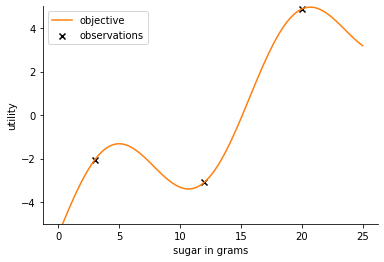

In [2]:
def f(x):
    return (np.sin(x / 2.5) * 6 + x) / 2.5 - 5.5


x_test = np.linspace(0, 25, 100).reshape(-1, 1)

# x_train = np.array([3]).reshape(-1, 1)
x_train = np.array([3, 12, 20]).reshape(-1, 1)
y_train = f(x_train)

plt.plot(x_test, f(x_test), c='C1', label='objective')
plt.scatter(x_train, y_train, c='k', marker='x', label='observations')

plt.ylim(-5, 5)
plt.xlabel('sugar in grams')
plt.ylabel('utility')
plt.legend();

In [3]:
gp = GPR(kernel=10 * RBF(length_scale=2.5), optimizer=None)

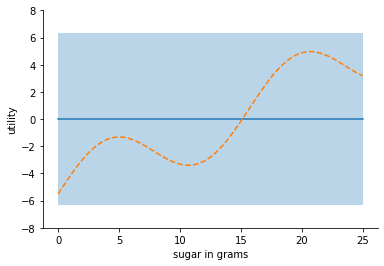

In [4]:
mean, sd = gp.predict(x_test, return_std=True)

plt.plot(x_test, mean, label='mean')
plt.fill_between(
    x_test.flatten(), 
    mean.flatten() + 2 * sd, mean.flatten() - 2 * sd, 
    alpha=0.3, label='95% CI'
)

plt.plot(x_test, f(x_test), c='C1', linestyle='--', label='objective')

plt.xlabel('sugar in grams')
plt.ylabel('utility')
plt.ylim(-8, 8)

plt.show()

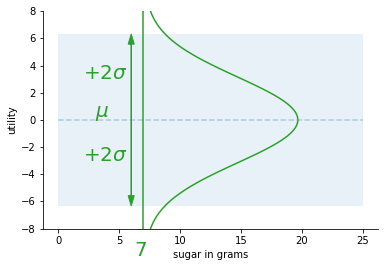

In [32]:
plt.plot(x_test, mean, alpha=0.3, linestyle='--', label='mean')
plt.fill_between(
    x_test.flatten(), 
    mean.flatten() + 2 * sd, mean.flatten() - 2 * sd, 
    alpha=0.1, label='95% CI'
)

x = 7
i = np.argmin(np.abs(x_test - x))
ys = np.linspace(-8, 8, 100)
pdfs = norm(loc=mean[i], scale=sd[i]).pdf(ys)

plt.axvline(7, c='C2')
plt.plot(x_test[i] + pdfs * 100, ys, c='C2')
plt.text(x - 0.75, -10, str(x), c='C2', fontsize=20)

plt.text(x - 4, mean[i] + 0.2, r'$\mu$', c='C2', fontsize=20)

plt.arrow(x - 1, mean[i], 0, 2 * sd[i], color='C2', head_width=0.5, length_includes_head=True)
plt.text(x - 5, mean[i] + 3, r'$ + 2 \sigma$', c='C2', fontsize=20)

plt.arrow(x - 1, mean[i], 0, - 2 * sd[i], color='C2', head_width=0.5, length_includes_head=True)
plt.text(x - 5, mean[i] - 3, r'$ + 2 \sigma$', c='C2', fontsize=20)

plt.xlabel('sugar in grams')
plt.ylabel('utility')
plt.ylim(-8, 8)

plt.show()

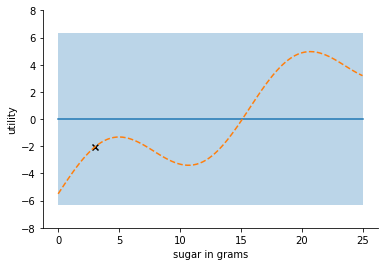

In [5]:
mean, sd = gp.predict(x_test, return_std=True)

plt.plot(x_test, mean, label='mean')
plt.fill_between(
    x_test.flatten(), 
    mean.flatten() + 2 * sd, mean.flatten() - 2 * sd, 
    alpha=0.3, label='95% CI'
)

plt.plot(x_test, f(x_test), c='C1', linestyle='--', label='objective')

plt.scatter(x_train, y_train, c='k', marker='x', label='observations')

plt.xlabel('sugar in grams')
plt.ylabel('utility')
plt.ylim(-8, 8)
# plt.legend()

plt.show()

In [11]:
gp.fit(x_train, y_train)

GaussianProcessRegressor(kernel=3.16**2 * RBF(length_scale=2.5), optimizer=None)

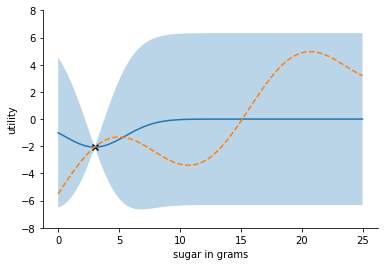

In [12]:
mean, sd = gp.predict(x_test, return_std=True)

plt.plot(x_test, mean, label='mean')
plt.fill_between(
    x_test.flatten(), 
    mean.flatten() + 2 * sd, mean.flatten() - 2 * sd, 
    alpha=0.3, label='95% CI'
)

plt.plot(x_test, f(x_test), c='C1', linestyle='--', label='objective')

plt.scatter(x_train, y_train, c='k', marker='x', label='observations')

plt.xlabel('sugar in grams')
plt.ylabel('utility')
plt.ylim(-8, 8)
# plt.legend()

plt.show()